# Research assignment 3

[your name] Waleed Rajabally

[working title of the project] Measuring racial impact on socioeconomic status

[date] 3/4/20

## 1. Build your hypothesis

Write bullet points that answer the following questions:

    A. What is your depedent variable? For this assignment, your depedent should be a continuous variable. Describe how your depedent variable is measured. If your data doesn't allow this, you can use either the General Social Survey 2018 or the Grant and Loan Repayment data. 
    
My dependent variable is PASEI10.
    
    B. What are the indepedent variables you are most interested in? Are they interval ratio or nominal? Why?

My independent variable is race.  I would like to see if there is an effect on socioeconomic status based on race. I am assuming that the respondent's race is identical to the father's race, which may not necessarily be true and can affect the accuracy of my results  

    C. What are your control variables? Are they interval ratio or nominal? Why?

My control variables are paeduc and age. I recoded age into 3 categories, ages 18-35, 36-50, and 51 and older.  The respondent's age provideds us of an estimate of their father's age.  If there is significant differences between the age categories this may imply that there is a generational difference as to how race influences socioeconomic status.

Controlling for father's education will clarify how race influences father's socioeconomic status based on their years of education.


    D. What are your hyphotheses on the relationships between your dependent and independent variables (including control variables)? Make seperate hypotheses for separate independent variables and for intervening relationships that involve multiple independent variables of interest.
    
I believe that respondent father's assumed race will impact socioeconomic status even when controlling for father's education.  I believe that black fathers will have lower socioeconomic status than other race categories despite having the same level of education.

## 2. Prepare your data

Do the following:

    A. Set current directory

    B. Set more off

    C. Creat log file
    
    D. Load only variable from the dataset that you will use

    E. Use -describe- and -codebook- to see details of the varaibles

In [1]:
clear
cd "/Users/waleed/Desktop/Soc_211_Methods"
capture log close
set more off
log using "/Users/waleed/Desktop/Soc_211_Methods/Week6_assignmentlog.log"
use /Users/waleed/Desktop/gradstats2/week6/GSS2018w6.dta



/Users/waleed/Desktop/Soc_211_Methods



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/waleed/Desktop/Soc_211_Methods/Week6_assignmentlog.log
  log type:  text
 opened on:   4 Mar 2020, 01:10:24



In [44]:
sum age
sum paeduc, de



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         age |      2,341    48.97138    18.06088         18         89


            Highest year school completed, father
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            3              0
10%            6              0       Obs               1,687
25%           10              0       Sum of Wgt.       1,687

50%           12                      Mean           11.88322
                        Largest       Std. Dev.      4.147774
75%           14             20
90%           16             20       Variance       17.20403
95%           18             20       Skewness      -.6677613
99%           20             20       Kurtosis       3.669459


## 3. Use scatterplots to visually assess relationships between your dependent variable and all of your independent variables

    A. Quietly generate scatterplots for the dependent variable and each independent variable (including contol variables). Then use graph combine to examine all of the scatter plots.

    B. Write a paragraph interpreting what the scatterplots show
    
The scatterplots show that as father's education increases so does father's socioeconomic status.  However for race we see that there is a higher concentration of socioeconomic for whites and others than there are for blacks.  The last scatterplot shows that there isn't a significant difference in socioeconomic status across age categories.

In [32]:
gen age_recode=1 if age <= 35
replace age_recode=2 if age > 35 & age <= 50
replace age_recode=3 if age > 50 



variable age_recode already defined


r(110);
r(110);


In [34]:
tab age_recode age in 1/10


           |                                         Age of respondent
age_recode |        42         43         55         59         62         63         67         71         74 |     Total
-----------+---------------------------------------------------------------------------------------------------+----------
         2 |         1          2          0          0          0          0          0          0          0 |         3 
         3 |         0          0          1          1          1          1          1          1          1 |         7 
-----------+---------------------------------------------------------------------------------------------------+----------
     Total |         1          2          1          1          1          1          1          1          1 |        10 


In [49]:
foreach x of var race paeduc age_recode {
quietly  graph twoway (scatter PASEI10 `x') (lfit PASEI10 `x', color(red)), name(`x', replace) legend(off) ytitle(Father's SES) scheme(plotplainblind)
}

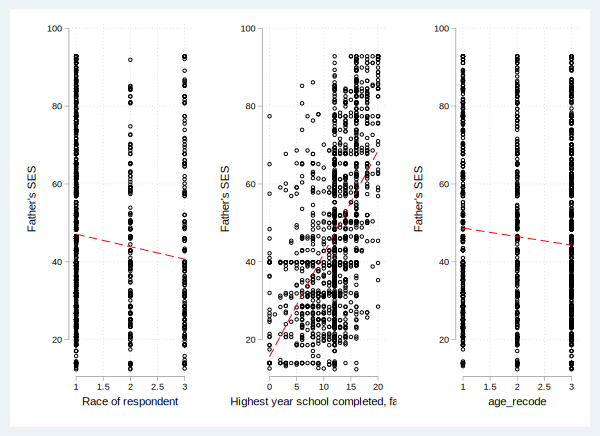

In [50]:
graph combine race paeduc age_recode, col(3) 

## 4. Assess multicorrelation among your independent variables

    A. Create a correlation matrix for all of your variables.

    B. . Write bullet points or a short paragraph summarizing what the matrix shows.
The matrix shows that as race moves higher in categories (2 for blacks and 3 for others) there is a negative correlation with socioeconomic status.  There is a positive association with father's education and father's socioeconomic status.  There is also a negative association between race and father's education.  As of right now I cannot tell if the relationship between race and socioeconomic status is being explained as a spurious relationship or interactionary relationship with father's education.    


In [48]:
pwcorr PASEI10 race paeduc age_recode


             |  PASEI10     race   paeduc age_re~e
-------------+------------------------------------
     PASEI10 |   1.0000 
        race |  -0.1061   1.0000 
      paeduc |   0.5259  -0.1937   1.0000 
  age_recode |  -0.0889  -0.1376  -0.2273   1.0000 


## 5. Describe at least 2 OLS models to test your hypotheses

Write a paragraph or a set of bullet points that explain:

    A. Which model tests which of your hypotheses
Model two tests my hypothesis with the inclusion of the control variable, paeduc.

    B. Which variables are included in each model
Model 1 includes SES status and race, Model 2 adds father's education, and Model 3 adds age_recode

    B. How/why adding particular variables to subsequent models will test for spurious or intervening relationships

By adding variables to subsequent models as dummy variables we are trying to see any fluctuations in the direction and strenght of the coefficients.

## 6. Write OLS regression equations for each model

Use subscripts to indicate which symbols represesent your different independent variables. To do so, you can copy and paste the LaTex code in this week's lesson notebook and edit the subscripts.

## 7. Estimate your models with stata

    A. Write Stata code to estimate the models and store the regression results
    
    B. Write code to output the estimates in a table within Jupyter Notebook in HTML (with %html magic) and as an RTF file

In [18]:
ssc install estout

checking estout consistency and verifying not already installed...
all files already exist and are up to date.


In [51]:
est clear


quietly eststo: reg PASEI10 i.race 
quietly eststo: reg PASEI10 i.race paeduc
quietly eststo: reg PASEI10 i.race paeduc i.age_recode

In [52]:
%html
esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2" "Model 3") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (paeduc "Father's Educ" realrinc "income" 2.race "black" 3.race "other race" ///
2.age_recode "36-50" 3.age_recode "51+") html

This front-end or document format cannot display HTML

## 8. Summarize the results for your hypotheses

    A. Which of your hypotheses are supported and which are rejected by the (in)consistency of coefficients across all of your models?

I believe my overall hypothesis is supported by the models.  Even when the control variables is added there is a negative correlation between the race dummy variable black and father's socioeconomic status.  When father's education is added the correlation reduces significantly but still demonstrates a strong negative correlation with a significance that's less than .01.  When age is added the coefficient remains relatively the same, but the significance drops to less than .05.
    
    
    B. Which of your hypotheses regarding intervening or spurious relationships are supported / rejected by similarities / differences in coefficients across all of your models?
    
With age it does not seem that there is any interactionary relationship.  I realize that because I didn't divide father's education into a categorical variable, I cannot really say what the relationship is to the by independent and dependent variables.  I did not realize that I should have categorized education as I did age in order to see a relationship.

    C. What ideas do you have for why any of your hypotheses were rejected? Are there additional omitted variables do you think you should include to test your hypotheses that might change your results? Why?
    
Since I did not categorize the education variable, I can't really determine how this interacts with father's economic status and race, and therefore can't accurately determine if race is affecting socioeconomic status even when controlling for education level.  As I mentioned earlier, I am assuming father's race based on the respondent's race, which limits the accuracy of my results.  Another variable that would help test my hypothesis would be father's occupation.  I would be able to see if race discrimination occurs across certain occupations which would have an effect on socioeconomic status